# Import libraries

In [2]:
import pandas as pd
import numpy as np
import random as rnd
import re
import pickle


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, pairwise_distances, classification_report
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score

# Data Handling Process

## Data Cleaning and Analysis

### Loading the data

In [3]:
data = pd.read_csv("total.csv",encoding='gbk')

In [4]:
data.shape

(34207, 10)

In [5]:
data.head()

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400


### Identifying null values

In [6]:
missing_values = ["0"]

In [7]:
data = pd.read_csv("total.csv",na_values = missing_values, encoding='gbk')

In [8]:
data.isnull().sum()

house_code          0
title               0
district            0
community         268
housing_estate    268
size                0
orientation         7
house_type          0
floor             268
price               0
dtype: int64

In [9]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400
...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200


In [10]:
data.isnull().sum()

house_code          0
title               0
district            0
community         268
housing_estate    268
size                0
orientation         7
house_type          0
floor             268
price               0
dtype: int64

In [11]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400
...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200


In [12]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400
...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200


In [13]:
data.insert(10,'room_nbr','?')

In [14]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,?
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,?
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,?
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,?
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,?
...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,?
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,?
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,?
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,?


In [15]:
data.insert(11,'living_nbr','?')
data.insert(12,'bath_nbr','?')

In [16]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,?,?,?
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,?,?,?
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,?,?,?
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,?,?,?
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,?,?,?
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,?,?,?
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,?,?,?
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,?,?,?


In [17]:
for index,row in data.iterrows():
    line = str(row['house_type'])
    matchObj0 = re.match( r'(.*)室(.*)厅(.*)卫', line, re.M|re.I)
    matchObj1 = re.match( r'(.*)房间(.*)卫', line, re.M|re.I)
    matchObj2 = re.match( r'(.*)居室', line, re.M|re.I)
    if matchObj0:
        row['room_nbr']=int(matchObj0.group(1))
        row['living_nbr']=int(matchObj0.group(2))
        row['bath_nbr']=int(matchObj0.group(3))
    elif matchObj1:
        row['room_nbr']= int(matchObj1.group(1))
        row['bath_nbr']= int(matchObj1.group(2))
        row['living_nbr']=0
    elif matchObj2:
        row['room_nbr']=int(matchObj2.group(1))
        row['bath_nbr']=0
        row['living_nbr']=0
    else:
        print(index)

In [18]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,2,1,1
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,3,1,1
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,2,2,1
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,4,0,1
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,2,0,1
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,2,1,1
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,3,1,1
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,2,0,2


In [19]:
data.isnull().sum()

house_code          0
title               0
district            0
community         268
housing_estate    268
size                0
orientation         7
house_type          0
floor             268
price               0
room_nbr            0
living_nbr          0
bath_nbr            0
dtype: int64

In [20]:
data.insert(13,'rent_type','?')
i = 0
for index,row in data.iterrows():
    line = str(row['title'])
    matchObj = re.match( r'合租', line, re.S)
    if matchObj:
        row['rent_type'] = 2
        i = i+1
    else:
        row['rent_type'] = 1
print("There are {} houses with rent type 2".format(i))  

There are 2227 houses with rent type 2


In [21]:
data.iloc[:,2].unique()

array(['昌平', '朝阳', '大兴', '东城', '房山', '丰台', '海淀', '怀柔', '门头沟', '密云', '平谷',
       '石景山', '顺义', '通州', '西城', '延庆', '亦庄开发区'], dtype=object)

In [22]:
# data.insert(14,'district_num','?')
# district_num = 0
# district_name = []
# n = 0
# for i in data.iloc[:,2]:
#     if data.iloc[n,2] in district_name:
#         data.iloc[n,14] = district_num
#         n = n+1
#     else:
#         district_name.append(data.iloc[n,2])
#         district_num = district_num + 1
#         data.iloc[n,14] = district_num
#         n = n+1

def ToNumber (row_now, row_add, row_name):
    data.insert(row_add,row_name,'?')
    district_num = {}
    district_name = []
    n = 0
    m = 0
    for i in data.iloc[:,row_now]:
        if data.iloc[n,row_now] in district_name:
            data.iloc[n,row_add] = district_num[data.iloc[n,row_now]]
            n = n+1
        else:
            district_name.append(data.iloc[n,row_now])
            m = m + 1
            district_num[data.iloc[n,row_now]] = m
            data.iloc[n,row_add] = district_num[data.iloc[n,row_now]]
            n = n+1
# change district to number            
ToNumber(2,14, 'district_num')

In [23]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,2,1,1,1,1
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,3,1,1,1,1
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,2,2,1,1,1
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,4,0,1,1,1
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,2,0,1,1,17
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,2,1,1,1,17
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,3,1,1,1,17
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,2,0,2,1,17


In [24]:
# change community to number
ToNumber(3,15, 'community_num')

In [25]:
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,2,1,1,1,1,1
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,3,1,1,1,1,2
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,2,2,1,1,1,3
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,4,0,1,1,1,4
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,2,0,1,1,17,92
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,2,1,1,1,17,93
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,3,1,1,1,17,93
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,2,0,2,1,17,92


In [26]:
# change housing_estate to number
ToNumber(4,16, 'housing_estate_num')
data

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num,housing_estate_num
0,BJ2726122206907613184,整租·西环里 2室1厅 南/北,昌平,西关环岛,西环里,60㎡,南 北,2室1厅1卫,高楼层（6层）,2800,2,1,1,1,1,1,1
1,BJ2726069415266222080,整租·华润理想国 3室1厅 南/北,昌平,北七家,华润理想国,91㎡,南 北,3室1厅1卫,中楼层（18层）,5000,3,1,1,1,1,2,2
2,BJ2726056512186490880,整租·紫金新干线 2室2厅 南/北,昌平,霍营,紫金新干线,103㎡,南 北,2室2厅1卫,中楼层（10层）,6800,2,2,1,1,1,3,3
3,BJ2724510101007507456,整租·金隅万科城悦嘉公寓 4房间 南,昌平,鼓楼大街,金隅万科城悦嘉公寓,75㎡,南,4房间1卫,地下室（22层）,3800,4,0,1,1,1,4,4
4,BJ2724739991941939200,整租·东亚上北中心 4房间 北,昌平,回龙观,东亚上北中心,65㎡,北,4房间1卫,中楼层（21层）,5400,4,0,1,1,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34202,BJ2646458133471838208,整租·易居国际 2房间 北,亦庄开发区,亦庄,易居国际,72㎡,北,2房间1卫,中楼层（17层）,5100,2,0,1,1,17,92,5534
34203,BJ2731978659249799168,整租·中信新城两限区 2室1厅 南,亦庄开发区,亦庄开发区其它,中信新城两限区,72㎡,南,2室1厅1卫,高楼层（19层）,4500,2,1,1,1,17,93,5527
34204,BJ2743592244962934784,整租·棠颂雅苑 3室1厅 南,亦庄开发区,亦庄开发区其它,棠颂雅苑,89㎡,南,3室1厅1卫,低楼层（22层）,5000,3,1,1,1,17,93,5547
34205,BJ2739096520669265920,整租·林肯公园 2房间 跃层 北,亦庄开发区,亦庄,林肯公园,35㎡,北,2房间2卫,高楼层（24层）,5200,2,0,2,1,17,92,5496


In [27]:
data.tail(50)

,house_code,title,district,community,housing_estate,size,orientation,house_type,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num,housing_estate_num
34157,BJ2736991560243101696,整租·贵园北里甲区 2室1厅 南/北,亦庄开发区,亦庄,贵园北里甲区,88㎡,南 北,2室1厅1卫,低楼层（6层）,4800,2,1,1,1,17,92,5474
34158,BJ2739905155821740032,整租·林肯公园 2室1厅 南/北,亦庄开发区,亦庄,林肯公园,92㎡,南 北,2室1厅1卫,高楼层（24层）,8350,2,1,1,1,17,92,5496
34159,BJ2740362199800217600,整租·林肯公园 2室2厅 南/北,亦庄开发区,亦庄,林肯公园,95㎡,南 北,2室2厅1卫,低楼层（24层）,7800,2,2,1,1,17,92,5496
34160,BJ2741125132197576704,整租·林肯公园 2室1厅 南,亦庄开发区,亦庄,林肯公园,94㎡,南,2室1厅1卫,高楼层（24层）,7800,2,1,1,1,17,92,5496
34161,BJ2742608069010923520,整租·林肯公园 1室0厅 南,亦庄开发区,亦庄,林肯公园,36㎡,南,1室0厅1卫,高楼层（24层）,4300,1,0,1,1,17,92,5496
34162,BJ2740525327825772544,整租·通泰国际公馆 2室1厅 南/北,亦庄开发区,亦庄,通泰国际公馆,70㎡,南 北,2室1厅1卫,中楼层（14层）,5000,2,1,1,1,17,92,5480
34163,BJ2741439107820421120,整租·通泰国际公馆 2室1厅 南/北,亦庄开发区,亦庄,通泰国际公馆,88㎡,南 北,2室1厅1卫,低楼层（15层）,6600,2,1,1,1,17,92,5480
34164,BJ2743615779303342080,整租·博客雅居 1室1厅 南,亦庄开发区,亦庄,博客雅居,59㎡,南,1室1厅1卫,高楼层（24层）,4500,1,1,1,1,17,92,5521
34165,BJ2707402317908951040,整租·宏仁家园 2室1厅 南/北,亦庄开发区,马驹桥,宏仁家园,85㎡,南 北,2室1厅1卫,中楼层（16层）,3000,2,1,1,1,17,222,5493
34166,BJ2741086370704662528,整租·宏仁家园 2室2厅 东/西,亦庄开发区,马驹桥,宏仁家园,91㎡,东 西,2室2厅1卫,低楼层（28层）,3800,2,2,1,1,17,222,5493


In [28]:
data.iloc[:,1].unique()

array(['整租·西环里 2室1厅 南/北', '整租·华润理想国 3室1厅 南/北', '整租·紫金新干线 2室2厅 南/北', ...,
       '整租·棠颂雅苑 3室1厅 南', '整租·林肯公园 2房间 跃层 北', '整租·棠颂雅苑 4室1厅 东南'],
      dtype=object)

In [29]:
to_drop = ['housing_estate','community','house_type','district','title','orientation','housing_estate_num','house_code']
data.drop(to_drop,inplace=True,axis=1)

In [30]:
data

,size,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60㎡,高楼层（6层）,2800,2,1,1,1,1,1
1,91㎡,中楼层（18层）,5000,3,1,1,1,1,2
2,103㎡,中楼层（10层）,6800,2,2,1,1,1,3
3,75㎡,地下室（22层）,3800,4,0,1,1,1,4
4,65㎡,中楼层（21层）,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
34202,72㎡,中楼层（17层）,5100,2,0,1,1,17,92
34203,72㎡,高楼层（19层）,4500,2,1,1,1,17,93
34204,89㎡,低楼层（22层）,5000,3,1,1,1,17,93
34205,35㎡,高楼层（24层）,5200,2,0,2,1,17,92


In [31]:
data.iloc[:,4].unique()

array([1, 2, 0, 3, 4, 6, 5], dtype=object)

In [32]:
data.isnull().sum()

size               0
floor            268
price              0
room_nbr           0
living_nbr         0
bath_nbr           0
rent_type          0
district_num       0
community_num      0
dtype: int64

In [33]:
for index,row in data.iterrows():
    line = str(row['size'])
    matchObj =  re.sub('\D', '', line)
    if matchObj:
        row['size']=int(matchObj)

In [34]:
data

,size,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60,高楼层（6层）,2800,2,1,1,1,1,1
1,91,中楼层（18层）,5000,3,1,1,1,1,2
2,103,中楼层（10层）,6800,2,2,1,1,1,3
3,75,地下室（22层）,3800,4,0,1,1,1,4
4,65,中楼层（21层）,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
34202,72,中楼层（17层）,5100,2,0,1,1,17,92
34203,72,高楼层（19层）,4500,2,1,1,1,17,93
34204,89,低楼层（22层）,5000,3,1,1,1,17,93
34205,35,高楼层（24层）,5200,2,0,2,1,17,92


In [35]:
for index,row in data.iterrows():
    line = str(row['floor'])
    line = line[0:3]
    row['floor'] = line

In [36]:
data

,size,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60,高楼层,2800,2,1,1,1,1,1
1,91,中楼层,5000,3,1,1,1,1,2
2,103,中楼层,6800,2,2,1,1,1,3
3,75,地下室,3800,4,0,1,1,1,4
4,65,中楼层,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
34202,72,中楼层,5100,2,0,1,1,17,92
34203,72,高楼层,4500,2,1,1,1,17,93
34204,89,低楼层,5000,3,1,1,1,17,93
34205,35,高楼层,5200,2,0,2,1,17,92


In [37]:
data.isnull().sum()

size             0
floor            0
price            0
room_nbr         0
living_nbr       0
bath_nbr         0
rent_type        0
district_num     0
community_num    0
dtype: int64

In [38]:
for index,row in data.iterrows():
    line = str(row['floor'])
    if line == 'nan':
        row['floor'] = data['floor'].mode(dropna=True)[0]

In [39]:
prepare = {
    "floor" : {"地下室":1, "低楼层" :2, "中楼层" :3, "高楼层" : 4}
}
data.replace(prepare,inplace=True)
data

,size,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60,4,2800,2,1,1,1,1,1
1,91,3,5000,3,1,1,1,1,2
2,103,3,6800,2,2,1,1,1,3
3,75,1,3800,4,0,1,1,1,4
4,65,3,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
34202,72,3,5100,2,0,1,1,17,92
34203,72,4,4500,2,1,1,1,17,93
34204,89,2,5000,3,1,1,1,17,93
34205,35,4,5200,2,0,2,1,17,92


In [40]:
data.iloc[:,0].unique()

array([60, 91, 103, 75, 65, 93, 97, 120, 140, 175, 117, 98, 90, 102, 52,
       74, 58, 104, 40, 63, 59, 95, 92, 85, 56, 87, 125, 164, 73, 82, 153,
       96, 61, 83, 66, 89, 81, 51, 46, 47, 36, 34, 70, 26, 78, 139, 50,
       77, 84, 101, 107, 135, 88, 80, 67, 169, 180, 182, 176, 118, 137,
       143, 229, 378, 146, 144, 166, 53, 68, 265, 154, 204, 155, 57, 55,
       200, 106, 72, 237, 100, 136, 195, 203, 37, 54, 124, 138, 38, 99,
       94, 113, 372, 174, 122, 121, 196, 32, 343, 115, 141, 190, 108, 228,
       111, 179, 43, 126, 105, 168, 110, 330, 300, 221, 134, 62, 76, 41,
       165, 123, 160, 238, 114, 183, 42, 128, 424, 207, 20, 112, 49, 198,
       116, 170, 127, 397, 133, 25, 64, 130, 86, 917, 220, 35, 149, 232,
       350, 243, 109, 210, 258, 172, 156, 177, 71, 69, 250, 131, 242, 218,
       226, 178, 148, 236, 150, 30, 271, 45, 163, 230, 257, 308, 171, 79,
       29, 129, 339, 307, 9187, 162, 119, 44, 251, 252, 292, 225, 205,
       312, 411, 132, 212, 313, 147, 219, 21, 48

In [41]:
data.iloc[:,1].unique()

array([4, 3, 1, 2], dtype=int64)

In [42]:
data.iloc[:,2].unique()

array(['2800', '5000', '6800', '3800', '5400', '5500', '7500', '7200',
       '9700', '7800', '6900', '6100', '4300', '4500', '5880', '6300',
       '3200', '6500', '6200', '10500', '9000', '4600', '3700', '5800',
       '7000', '3500', '5600', '3100', '4200', '4100', '4000', '2000',
       '2600', '5200', '2400', '8500', '7300', '2900', '5300', '2500',
       '5700', '6000', '11000', '10000', '8000', '2770', '30000', '6400',
       '13000', '10800', '13500', '5100', '14000', '8600', '12400',
       '9200', '3300', '9750', '2100', '1800', '6700', '3600', '2750',
       '16000', '4800', '12000', '4750', '7600', '15000', '29000', '4400',
       '4700', '3000', '8200', '2300', '9800', '25000', '4900', '5900',
       '45000', '3400', '3900', '6600', '11500', '9100', '2700', '22000',
       '21000', '7100', '8300', '5750', '75000', '9600', '8900', '7400',
       '18000', '7900', '8800', '33000', '28000', '11700', '2850', '3350',
       '10600', '6666', '11900', '9500', '8700', '14500', '133

In [43]:
data.iloc[:,3].unique()

array([2, 3, 4, 7, 1, 5, 6, 20, 8, 9, 12, 10, 16, 18, 11], dtype=object)

In [44]:
data.iloc[:,4].unique()

array([1, 2, 0, 3, 4, 6, 5], dtype=object)

In [45]:
data.iloc[:,5].unique()

array([1, 2, 3, 0, 5, 4, 8, 9, 6, 7], dtype=object)

In [46]:
data.iloc[:,6].unique()

array([1, 2], dtype=object)

In [47]:
data.iloc[:,7].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=object)

In [48]:
data.iloc[:,8].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 

In [49]:
for index,row in data.iterrows():
    line = str(row['price'])
    matchObj = re.match( r'(\d+)\D+(\d+)', line)
    if matchObj:
        print(row['price'])
        data.at[index,'price'] = (int(matchObj.group(1))+int(matchObj.group(2)))/2

2090-2490
2400-2990
3080-3580
3280-3580
3080-3800
2200-3400
2150-3800
2000-2100
2050-2300
2200-2550
1700-2300
3399-4099
3700-4200
3700-4600
2100-2200
2200-2550
2700-3000
3080-3580
2980-3580
2450-2700
2200-3300
2380-2700
3400-3899
2700-3200
2700-2800
3750-4600
3500-4000
3099-4599
3400-4000
2090-2490
2400-2990
3080-3580
3280-3580
3080-3800
4200-4400
3400-3800
3400-4000
3299-3599
2560-3400
1700-2300
3399-4099
3700-4200
3700-4600
2100-2200
2200-2550
2700-3000
3000-3500
3000-3500
2000-2400
2500-3300
2700-3800
3299-4599
2800-3900
2800-3900
3099-4599
2600-3200
2300-2400
2000-2300
3900-4300
2800-2900
1600-1700
3900-4300
2800-2900
6000-6800
6000-6200
6000-6200
6000-6800
6000-6200
6000-6200
4900-5000
5400-5600
4900-5000
4900-5000
5600-6810
5700-6000
3200-6100
4998-5000
8000-12000
7300-7600
7600-8300
5600-6810
9000-11000
12500-14000
12500-14000
10500-14000
3100-3800
3800-3900
2280-2480
2480-2680
5000-5900
7500-7600
5500-6000
5500-5800
5000-5900
7500-7600
5000-5900
6500-7050
4680-4860
4275-4500
31

In [50]:
data.iloc[:,2].unique()

array(['2800', '5000', '6800', '3800', '5400', '5500', '7500', '7200',
       '9700', '7800', '6900', '6100', '4300', '4500', '5880', '6300',
       '3200', '6500', '6200', '10500', '9000', '4600', '3700', '5800',
       '7000', '3500', '5600', '3100', '4200', '4100', '4000', '2000',
       '2600', '5200', '2400', '8500', '7300', '2900', '5300', '2500',
       '5700', '6000', '11000', '10000', '8000', '2770', '30000', '6400',
       '13000', '10800', '13500', '5100', '14000', '8600', '12400',
       '9200', '3300', '9750', '2100', '1800', '6700', '3600', '2750',
       '16000', '4800', '12000', '4750', '7600', '15000', '29000', '4400',
       '4700', '3000', '8200', '2300', '9800', '25000', '4900', '5900',
       '45000', '3400', '3900', '6600', '11500', '9100', '2700', '22000',
       '21000', '7100', '8300', '5750', '75000', '9600', '8900', '7400',
       '18000', '7900', '8800', '33000', '28000', '11700', '2850', '3350',
       '10600', '6666', '11900', '9500', '8700', '14500', '133

In [51]:
data

,size,floor,price,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60,4,2800,2,1,1,1,1,1
1,91,3,5000,3,1,1,1,1,2
2,103,3,6800,2,2,1,1,1,3
3,75,1,3800,4,0,1,1,1,4
4,65,3,5400,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...,...
34202,72,3,5100,2,0,1,1,17,92
34203,72,4,4500,2,1,1,1,17,93
34204,89,2,5000,3,1,1,1,17,93
34205,35,4,5200,2,0,2,1,17,92


In [52]:
data.iloc[:,8].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 

In [53]:
data.dtypes

size             object
floor             int64
price            object
room_nbr         object
living_nbr       object
bath_nbr         object
rent_type        object
district_num     object
community_num    object
dtype: object

In [54]:
data=pd.DataFrame(data,dtype=np.int64);

In [55]:
data.dtypes

size             int64
floor            int64
price            int64
room_nbr         int64
living_nbr       int64
bath_nbr         int64
rent_type        int64
district_num     int64
community_num    int64
dtype: object

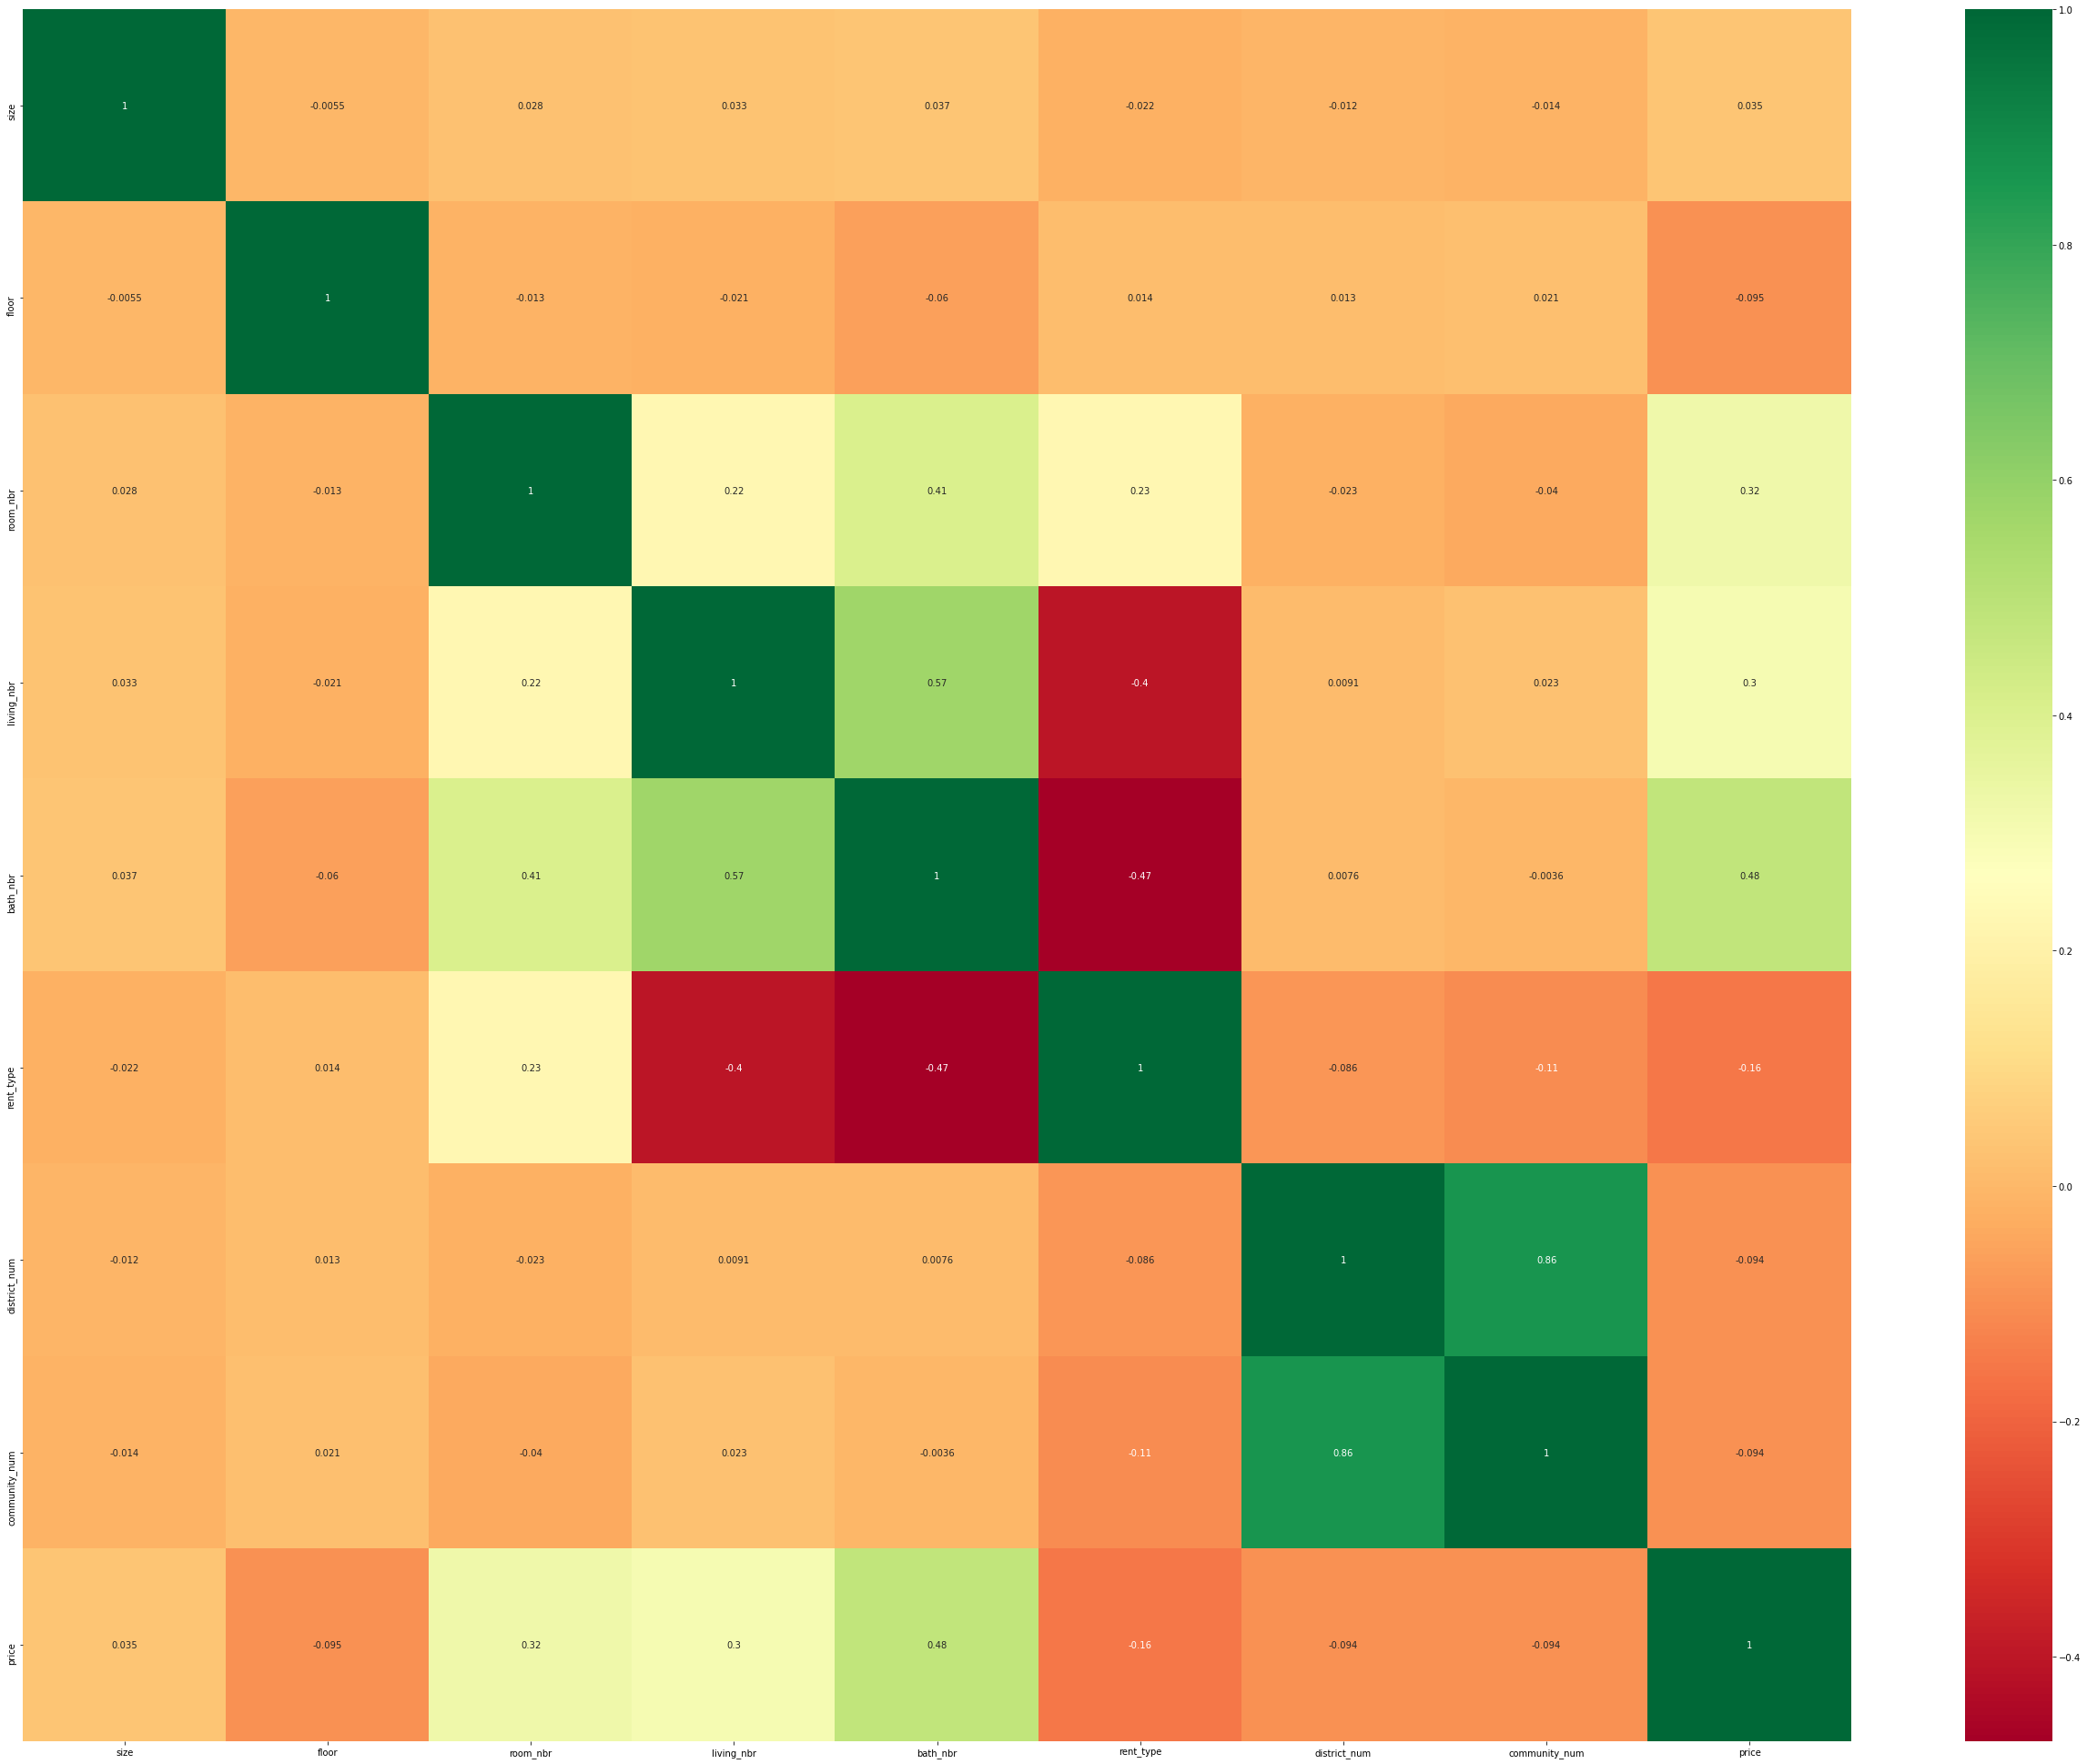

In [56]:
target = data['price']
data1 = data.drop('price',axis=1)
combine = pd.concat([data1, target], axis=1)
corr_mat = combine.corr()

plt.figure(figsize=(45,35))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

In [57]:
X = data.drop(['price'], axis=1).copy()
y = data['price'].copy()

In [58]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Modeling Process

### Feature Normalisation

In [59]:
sc = StandardScaler()
X_train_valid_n = sc.fit_transform(X_train_valid)
X_test_n = sc.transform(X_test)

### KNN

### Validation Set

In [59]:
d_k_accuracy = []
for i in range(1,9):
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_n, y_train_valid, test_size=0.1*i,random_state=42)
    X_valid_n = sc.transform(X_valid)
    knn = KNeighborsClassifier(n_neighbors=50)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid_n)
    d_k_accuracy.append(metrics.accuracy_score(y_valid, pred))

Text(0, 0.5, 'Accuracy')

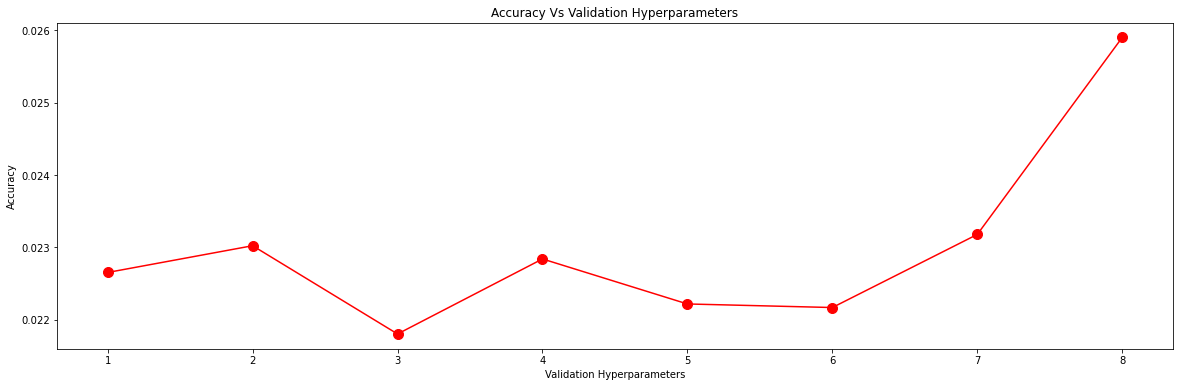

In [60]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 9), d_k_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs Validation Hyperparameters')
plt.xlabel('Validation Hyperparameters')
plt.ylabel('Accuracy')

### Hyperparameters Evaluation

#### K value

In [61]:
knn_k_accuracy = []
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_n, y_train_valid, test_size=0.2,random_state=42)
X_valid_n = sc.transform(X_valid)
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_valid_n)
    knn_k_accuracy.append(metrics.accuracy_score(y_valid, pred))

Text(0, 0.5, 'Accuracy')

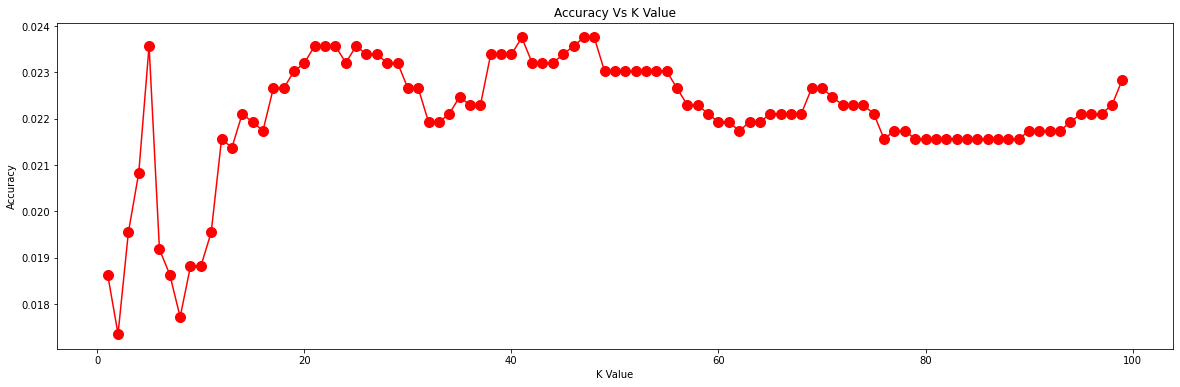

In [62]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 100), knn_k_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

#### P value

In [63]:
knn_p_accuracy = []
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid_n, y_train_valid, test_size=0.2,random_state=42)
X_valid_n = sc.transform(X_valid)
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=41,p=i)
    knn.fit(X_train, y_train) 
    pred = knn.predict(X_valid_n)
    knn_p_accuracy.append(metrics.accuracy_score(y_valid, pred))

Text(0, 0.5, 'Accuracy')

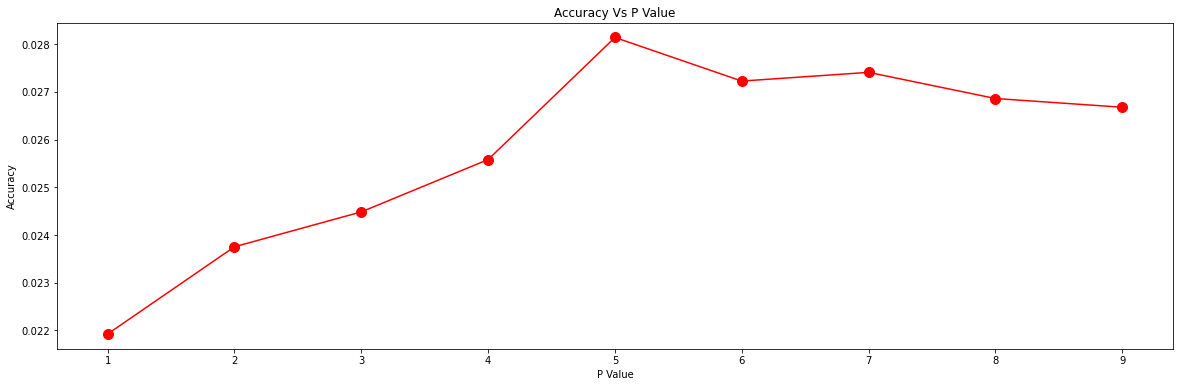

In [64]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 10), knn_p_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs P Value')
plt.xlabel('P Value')
plt.ylabel('Accuracy')

### KNN K=41 P=5 8:2:2 ACCURACY=0.028 

### Naibe Bayes

### Validation Set

In [65]:
d_nb_accuracy = []
for i in range(1,9):
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1*i,random_state=42)
    gnb = MultinomialNB()
    gnb.fit(X_train, y_train)
    pred = gnb.predict(X_valid)
    d_nb_accuracy.append(metrics.accuracy_score(y_valid, pred))

Text(0, 0.5, 'Accuracy')

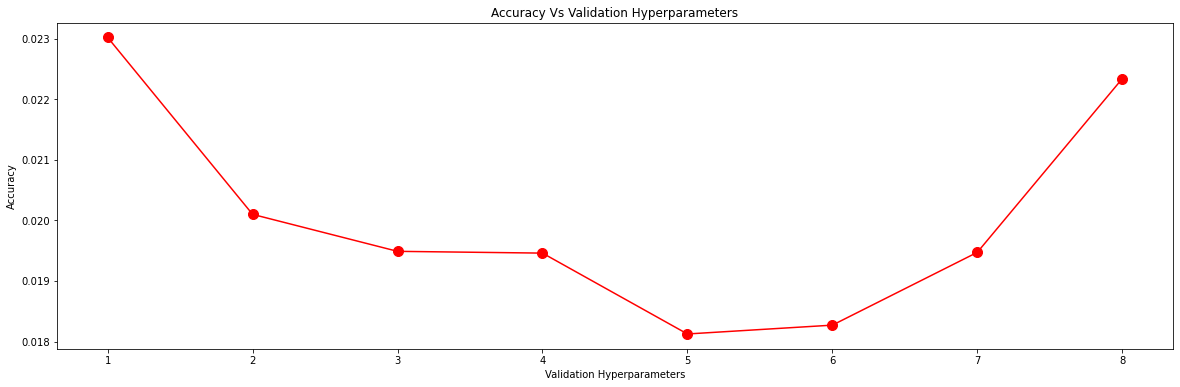

In [66]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 9), d_nb_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs Validation Hyperparameters')
plt.xlabel('Validation Hyperparameters')
plt.ylabel('Accuracy')

### Hyperparameters Evaluation

### Smoothing

In [67]:
rc_accuracy=[]
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1,random_state=42)
for i in range(1,10):
    gnb = MultinomialNB(alpha=i)
    gnb.fit(X_train, y_train)
    pred = gnb.predict(X_valid)
    a=0
    for x,y in zip(pred, y_valid):
        z = abs((x-y)/y)
        if z<0.4:
            a=a+1
    b=a/pred.size
    gnb_nb_accuracy.append(b)

Text(0, 0.5, 'Accuracy')

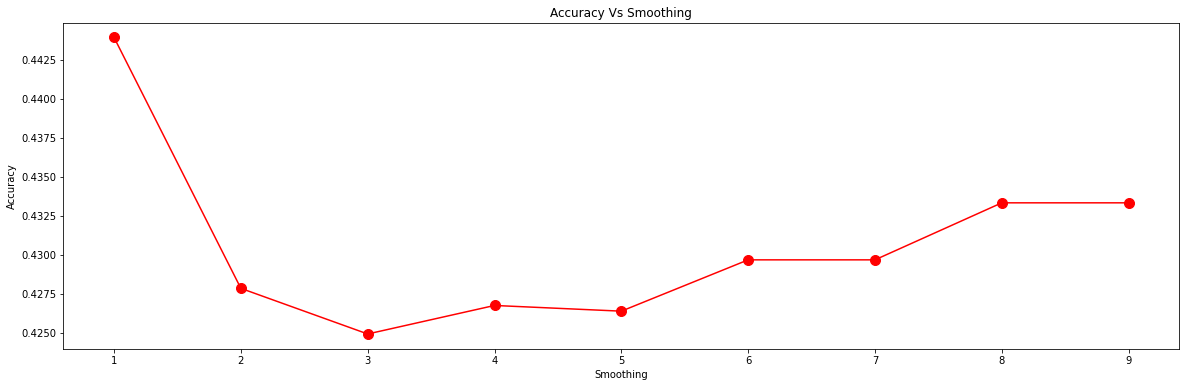

In [68]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 10), gnb_nb_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs Smoothing')
plt.xlabel('Smoothing')
plt.ylabel('Accuracy')

## NaiVe Bayes smoothing alpha=1, 8 2 1, accuracy 0.023

## Naiber Bayes is highly used in recommendation system, and it has fast speed , but the accuracy is not good！

In [60]:
rf_clf_accuracy=[]
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1,random_state=42)
for i in range(1,10):
    rf_clf = RandomForestClassifier(n_estimators=30*i, max_depth=10,random_state=42)
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_valid)
    a=0
    for x,y in zip(pred, y_valid):
        z = abs((x-y)/y)
        if z<0.4:
            a=a+1
    b=a/pred.size
    rf_clf_accuracy.append(b)

Text(0, 0.5, 'Accuracy')

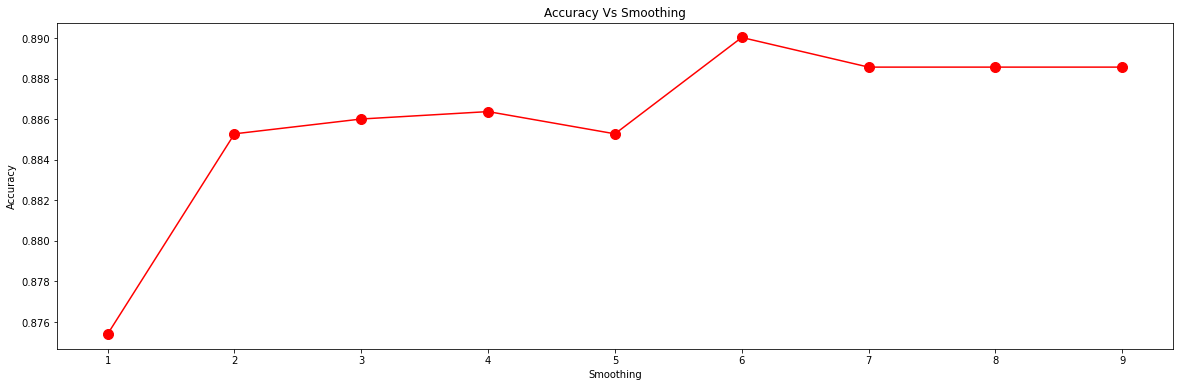

In [61]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 10), rf_clf_accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs Smoothing')
plt.xlabel('Smoothing')
plt.ylabel('Accuracy')

In [75]:
X

,size,floor,room_nbr,living_nbr,bath_nbr,rent_type,district_num,community_num
0,60,4,2,1,1,1,1,1
1,91,3,3,1,1,1,1,2
2,103,3,2,2,1,1,1,3
3,75,1,4,0,1,1,1,4
4,65,3,4,0,1,1,1,5
...,...,...,...,...,...,...,...,...
34202,72,3,2,0,1,1,17,92
34203,72,4,2,1,1,1,17,93
34204,89,2,3,1,1,1,17,93
34205,35,4,2,0,2,1,17,92


In [76]:
y

0        2800
1        5000
2        6800
3        3800
4        5400
         ... 
34202    5100
34203    4500
34204    5000
34205    5200
34206    5200
Name: price, Length: 34207, dtype: int64

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.1,random_state=42)
rf_clf = RandomForestClassifier(n_estimators=180, max_depth=10,random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_valid)
a=0
for x,y in zip(pred, y_valid):
    z = abs((x-y)/y)
    if z<0.4:
        a=a+1
b=a/pred.size
print(b)

0.8900255754475703


In [69]:
rf_clf = RandomForestClassifier(n_estimators=180, max_depth=10,random_state=42)
rf_clf.fit(X_train, y_train)
pickle.dump(rf_clf, open('model.pkl','wb'))